In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from sklearn.neighbors._kd_tree import KDTree
import time
from data_utils import load_dataset

Scratch cell

In [7]:
theta = np.array([0.05, 0.1, 0.5, 1, 2])
x = np.array([[1,2], [2,2], [3,2], [4,2], [5,2]])
y = np.array([[7,1], [3,5], [1,7], [1,5]])
#print(len(x[0]))
x1 = np.array([[1],[2],[3],[4]])
x2 = np.array([[5],[6],[7],[8]])
#print(x1)
x_norm = np.linalg.norm(x, 1, axis=1)
y_norm = np.linalg.norm(y, 1, axis=1)
#print(x2-np.transpose(x1))
#print(x_norm)
#print(x_norm.reshape(len(x_norm), 1))
#x_tr = np.array([[2], [4], [1], [9], [12]])
#y = np.array([[9], [0], [12], [15], [12]])
# x1 = gaussian_rbf_regression(x_tr, x, 1, 1)
# x2 = gaussian_rbf_regression(x_tr, x, 1, 2)

x = np.expand_dims(x, axis=1)
print(x)
y = np.expand_dims(y, axis=0)
print(y)
print(x-y)
#print(x-y)
#print(x2.dot(y))

[[[1 2]]

 [[2 2]]

 [[3 2]]

 [[4 2]]

 [[5 2]]]
[[[7 1]
  [3 5]
  [1 7]
  [1 5]]]
[[[-6  1]
  [-2 -3]
  [ 0 -5]
  [ 0 -3]]

 [[-5  1]
  [-1 -3]
  [ 1 -5]
  [ 1 -3]]

 [[-4  1]
  [ 0 -3]
  [ 2 -5]
  [ 2 -3]]

 [[-3  1]
  [ 1 -3]
  [ 3 -5]
  [ 3 -3]]

 [[-2  1]
  [ 2 -3]
  [ 4 -5]
  [ 4 -3]]]


## RBF Regression

Gaussian RBF Regression: returns a K matrix with the kernel evaluations, straight from the Quercus ipynb

In [4]:
def gaussian_rbf_regression(x, z, theta):
    # multidimensional x: normalize into an nx1 first, then do the calcualtion on two dim 1 features
    x = np.expand_dims(x, axis=1)
    z = np.expand_dims(z, axis=0)
    # x and z now are mxn 
    return np.exp(-np.sum(np.square(x-z)/theta, axis=2, keepdims=False))

Mauna Loa
- Copy paste for rosenbrock: replace import statement

In [11]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')

thetas = np.array([0.05, 0.1, 0.5, 1, 2])
regs = np.array([0.001, 0.01, 0.1, 1]) # lambda values

best_valid_RMSE = float('inf') # tracks l2 loss
best_theta = None
best_lambda = None
identity = np.identity(len(x_train))

for theta in thetas:
    for lam in regs:
        K_train = gaussian_rbf_regression(x_train, x_train, theta)
        #print(K_train - lam*identity)
        cho = scipy.linalg.cho_factor(K_train + lam*identity)
        alpha = scipy.linalg.cho_solve(cho, y_train)

        K_valid = gaussian_rbf_regression(x_valid, x_train, theta)
        predictions = K_valid.dot(alpha)
        delta_y = (y_valid - predictions)
        #print(delta_y)
        valid_RMSE = np.linalg.norm((y_valid - predictions))/np.sqrt(len(y_test))
        if valid_RMSE < best_valid_RMSE:
            best_valid_RMSE = valid_RMSE
            best_theta = theta
            best_lambda = lam

print('best validation RMSE:', best_valid_RMSE, ', best theta:', best_theta, ', best lambda:', best_lambda)

## Model construction
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

identity = np.identity(len(x_train))
K_train = gaussian_rbf_regression(x_train, x_train, best_theta)
cho = scipy.linalg.cho_factor(K_train + best_lambda*identity)
alpha = scipy.linalg.cho_solve(cho, y_train)

K_test = gaussian_rbf_regression(x_test, x_train, theta)
predictions = K_test.dot(alpha)

RMSE = np.linalg.norm(y_test - predictions)/np.sqrt(len(y_test))
print('RMSE on test set:', RMSE)

best loss: 0.17543551317670739 , best theta: 1.0 , best lambda: 0.001
RMSE on test set: 0.13944932164766788


Rosenbrock

best validation RMSE: 0.19323958697382382 , best theta: 2.0 , best lambda: 0.001
RMSE on test set: 0.14812442755132352


Text(0.5, 1.0, 'Looking at the Rosenbrock Dataset')

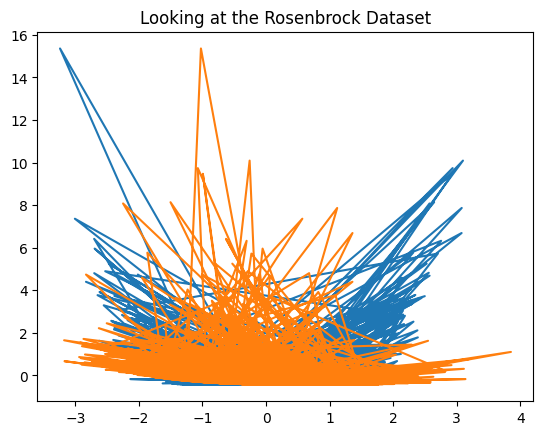

In [16]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('rosenbrock', n_train=1000, d=2)
thetas = np.array([0.05, 0.1, 0.5, 1, 2])
regs = np.array([0.001, 0.01, 0.1, 1]) # lambda values

best_valid_RMSE = float('inf') # tracks l2 loss
best_theta = None
best_lambda = None
identity = np.identity(len(x_train))

for theta in thetas:
    for lam in regs:
        K_train = gaussian_rbf_regression(x_train, x_train, theta)
        #print(K_train - lam*identity)
        cho = scipy.linalg.cho_factor(K_train + lam*identity)
        alpha = scipy.linalg.cho_solve(cho, y_train)

        K_valid = gaussian_rbf_regression(x_valid, x_train, theta)
        predictions = K_valid.dot(alpha)
        delta_y = (y_valid - predictions)
        #print(delta_y)
        valid_RMSE = np.linalg.norm((y_valid - predictions))/np.sqrt(len(y_test))
        if valid_RMSE < best_valid_RMSE:
            best_valid_RMSE = valid_RMSE
            best_theta = theta
            best_lambda = lam

print('best validation RMSE:', best_valid_RMSE, ', best theta:', best_theta, ', best lambda:', best_lambda)
## Model construction
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

identity = np.identity(len(x_train))
K_train = gaussian_rbf_regression(x_train, x_train, best_theta)
cho = scipy.linalg.cho_factor(K_train + best_lambda*identity)
alpha = scipy.linalg.cho_solve(cho, y_train)

K_test = gaussian_rbf_regression(x_test, x_train, theta)
predictions = K_test.dot(alpha)

RMSE = np.linalg.norm(y_test - predictions)/np.sqrt(len(y_test))
print('RMSE on test set:', RMSE)

## Testing shape of Rosenbrockfor report
plt.plot(x_train, y_train)
plt.title('Looking at the Rosenbrock Dataset')

## Greedy Regression


Observing the mauna loa dataset

Text(0.5, 1.0, 'Plotting the Mauna Loa Training Dataset')

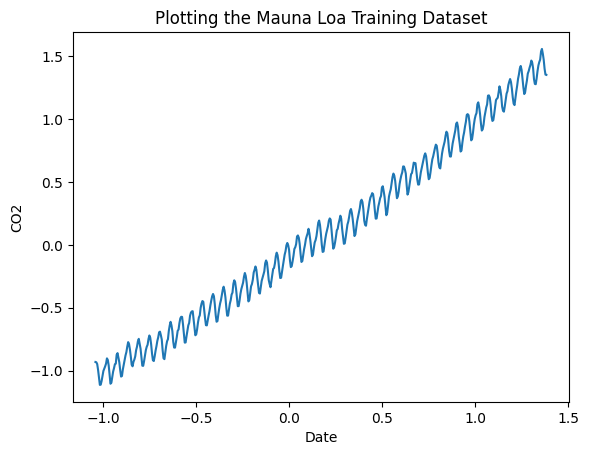

In [4]:
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
plt.plot(x_train,y_train)
plt.xlabel('Date')
plt.ylabel('CO2')
plt.title('Plotting the Mauna Loa Training Dataset')

- The data looks like an upward trending sinusoid
- Suggests we should choose a basis function in the form f(x) = $w_1 sin ax$ +$w_2x$+ $w_3C$
- Basis function selections:
    - f(x) = 1
    - f(x) = polynomial terms (x, $x^2$, $x^3$)
    - 196 functions left:
    - 98 of f(x) = cos a*pi x
    - 98 of f(x) = sin a*pi x , vary a for both these guys
    - choose a from (1, 98), -> brings total to 196
    - (1/44, 1/43, ..., 1/2) was tested but the model needs high coefficient for a to work
    - finally, choose a = pi: brings us to 200

In [7]:
def sine(a):
    return lambda x: np.sin(a*np.pi*x)

def cos(a):
    return lambda x: np.cos(a*np.pi*x)

def poly(p):
    return lambda x: x**p

length of the dictionary: 200
selected: [1, 72, 2, 0, 142, 5, 73, 143, 7, 10, 11, 4, 12, 23]
weights: [[ 0.98811616]
 [-0.09747871]
 [ 0.15142112]
 [-0.1445107 ]
 [-0.02144497]
 [ 0.03392052]
 [ 0.0138024 ]
 [ 0.01328554]
 [ 0.01363485]
 [ 0.00953206]
 [ 0.00814077]
 [-0.00716532]
 [ 0.00523233]
 [ 0.00483482]]


Text(0.5, 1.0, 'Mauna Loa Testing Predictions On the Actual Data')

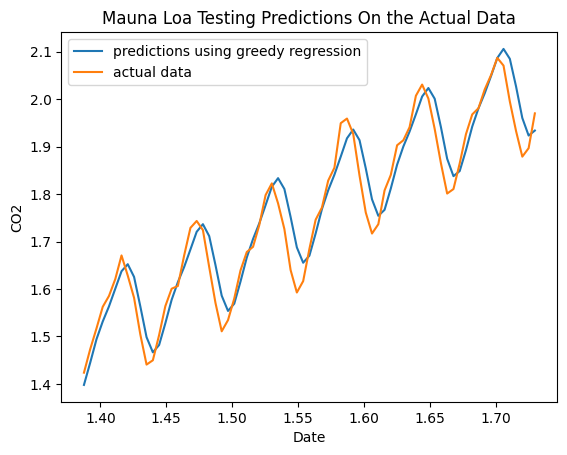

In [8]:
## building the dictionary
dict = []
## OLD DICTIONARY MODEL: shifted 1/a terms to more a terms
# for i in [0,1,2,3]:
#     dict.append(poly(i))

# for i in range(1,49+1):
#     dict.append(sine(i))
#     dict.append(cos(i))
#     if i != 1:
#         dict.append(sine(1/i))
#         dict.append(cos(1/i))

# dict.append(sine(np.pi))
# dict.append(cos(np.pi))
# create dictionary (list) of basis func

for i in [0,1,2,3]:
    dict.append(poly(i))
# 196 functions left
for i in range(1,196//2 + 1):
    dict.append(sine(i))
    dict.append(cos(i))



print('length of the dictionary:', len(dict))
#print(dict[0](2)) #gives us function @ index 0 with inpuit 2

## THE ALGORITHM
x_train, x_valid, x_test, y_train, y_valid, y_test = load_dataset('mauna_loa')
x_train = np.vstack([x_valid, x_train])
y_train = np.vstack([y_valid, y_train])

selected = []
candidates = [idx for idx in range(200)]
k = 0
r = np.copy(y_train)
cur_mdl = float('-inf')
last_mdl = float('inf')
Stop = False
N = len(x_train)
#print(x_train)
phi = np.array(dict[2](x_train))
#print(phi)
while Stop == False:
#while k < 5:
#while np.linalg.norm(r) > eps:
    k = k+1
    # pick a new basis from dictionary
    J = []
    for i in candidates:
        phi = np.array(dict[i](x_train))
        J.append(np.square(np.transpose(phi).dot(r)) / (np.transpose(phi).dot(phi)))
    #print(J)
    i_k = np.argmax(J)
    #print(i_k)
    #print(candidates[i_k])
    selected.append(candidates[i_k])
    del candidates[i_k]
    # solve for weights: using economy SVD to guarantee a solution
    phi_selected = np.zeros((N,k))
    #print(len(selected))
    for i in range(len(selected)):
        phi_selected[:,i] = np.array(dict[selected[i]](x_train)).transpose()

    # SVD guarantees a solution, as in lecture
    U, sigma, V_t = scipy.linalg.svd(phi_selected, full_matrices=False, compute_uv=True)
    w = V_t.T.dot(U.T.dot(y_train) / np.reshape(sigma, (-1,1))) # -1 to let the program reshape by itself

    prediction = phi_selected.dot(w)
    r = y_train - prediction
    # update mdl: stopping criterion
    # doesn't work exactly like epsilon in lecture: have to track the moment mdl goes up instead of having some defined stopping criterion
    cur_mdl = N/2 * np.log(np.linalg.norm(r)) + k/2 * np.log(N)
    if cur_mdl > last_mdl:
        Stop = True
    else:
        last_mdl = cur_mdl

#print(w)
#print(candidates)
#print(k)
#print(prediction)
# predict on the test set
phi_selected = np.zeros((len(x_test),k))
for i in range(len(selected)):
    # y = w dot phi(x)
    phi_selected[:,i] = np.array(dict[selected[i]](x_test)).transpose()
predictions = phi_selected.dot(w)

print('selected:', selected)
print('weights:', w)
plt.plot(x_test, predictions)
plt.plot(x_test, y_test)
plt.xlabel('Date')
plt.ylabel('CO2')
plt.legend(['predictions using greedy regression', 'actual data'])
plt.title('Mauna Loa Testing Predictions On the Actual Data')

#plt.plot(x_train, y_train)

To find what basis function selected: 
- Sine terms are even index, cos terms are odd index
- index = 2a + 2 ( for sine)
- index 72 -> sin $35\pi$ x
- index 142 -> sin $70\pi$ x

The Final model: $\newline$ $\newline$
- 0.98811616:  x
- -0.09747871: sin 35pi x
- 0.15142112:  x^2
- -0.1445107:  sin 70pi x
- -0.02144497: Constant
- 0.03392052:  cos pix
- 0.0138024:   cos 35pix
- 0.01328554:  cos 70pix
- 0.01363485:  cos 2pix
- 0.00953206:  sin 4pix
- 0.00814077:  cos 4pix
- -0.00716532: sin pix
- 0.00523233:  sin 5pix
- 0.00483482:  cos 10pix